In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, AgglomerativeClustering,SpectralClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyamg
import pandas_profiling

/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda3/lib/python3.6

In [3]:
my_df = pd.read_csv('scores_final.csv')

In [4]:
my_df.head()

,Unnamed: 0,Anon. ID,Q1,Q2_total,Q2s_1,Q2s_2,Q2s_3,Q2s_4,Q2s_5,Q2s_6,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,0,8193,7,36,1,2,3,4,5,6,...,3,3,3,3,3,3,3,3,3,3
1,1,20486,6,16,1,0,0,4,5,6,...,0,5,0,5,5,2,3,5,2,5
2,2,20493,6,4,0,0,0,4,0,0,...,3,5,0,5,5,3,2,1,1,2
3,3,20499,3,9,0,2,3,4,0,0,...,5,2,1,3,5,2,3,5,3,5
4,4,45077,5,3,0,0,3,0,0,0,...,0,0,0,3,0,0,2,0,0,2


In [5]:
my_df=my_df.set_index('Anon. ID')

In [6]:
my_df = my_df.drop('Unnamed: 0',axis = 1)

In [7]:
my_df.head()

,Q1,Q2_total,Q2s_1,Q2s_2,Q2s_3,Q2s_4,Q2s_5,Q2s_6,Q2s_7,Q2s_8,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
Anon. ID,,,,,,,,,,,,,,,,,,,,,
8193,7,36,1,2,3,4,5,6,7,8,...,3,3,3,3,3,3,3,3,3,3
20486,6,16,1,0,0,4,5,6,0,0,...,0,5,0,5,5,2,3,5,2,5
20493,6,4,0,0,0,4,0,0,0,0,...,3,5,0,5,5,3,2,1,1,2
20499,3,9,0,2,3,4,0,0,0,0,...,5,2,1,3,5,2,3,5,3,5
45077,5,3,0,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2,0,0,2


In [8]:
##Isolate only Question 2
df_2 = my_df[['Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4', 'Q2s_5', 'Q2s_6',
       'Q2s_7', 'Q2s_8']]
df_2.index = my_df.index

In [9]:
df_2.head()

,Q2s_1,Q2s_2,Q2s_3,Q2s_4,Q2s_5,Q2s_6,Q2s_7,Q2s_8
Anon. ID,,,,,,,,
8193,1,2,3,4,5,6,7,8
20486,1,0,0,4,5,6,0,0
20493,0,0,0,4,0,0,0,0
20499,0,2,3,4,0,0,0,0
45077,0,0,3,0,0,0,0,0


In [10]:
#Different Standardizations:
df_2_std = StandardScaler().fit_transform(df_2)
df_2_mm = MinMaxScaler().fit_transform(df_2)

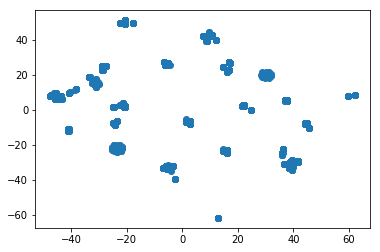

In [11]:
tsne = TSNE(learning_rate = 100)
tsne_features = tsne.fit_transform(df_2)
xt = tsne_features[:,0]
yt = tsne_features[:,1]
plt.scatter(xt,yt)
plt.show()

In [12]:
#Function for KMEANS
def K_means(X,cluster_list,track = True):
    for n_clusters in cluster_list:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        ch_score = calinski_harabaz_score(X,cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
        print("For n_clusters =",n_clusters,
          "The average Calinski_Harabaz Score is :", ch_score)
        if track==True:
            models_.append('KMeans')
            n_clusters_.append(n_clusters)
            sil_score_.append(silhouette_avg)
            ch_score_.append(ch_score)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        col = 'K'+str(n_clusters)
        if track==True:
            labels_df[col]=sample_silhouette_values

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(xt,yt, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

In [13]:
#Function for Agglomerative
def Agglom(X,cluster_list,track = True):
    for n_clusters in cluster_list:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        ch_score = calinski_harabaz_score(X,cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
        print("For n_clusters =",n_clusters,
          "The average Calinski_Harabaz Score is :", ch_score)
        if track==True:
            models_.append('Agglomerative')
            n_clusters_.append(n_clusters)
            sil_score_.append(silhouette_avg)
            ch_score_.append(ch_score)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        col = 'Agg'+str(n_clusters)
        if track==True:
            labels_df[col]=sample_silhouette_values

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(xt,yt, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


        plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

In [14]:
X = my_df.copy()
clusters_list = [2,3,4,5,6]
models_ = []
n_clusters_ = []
sil_score_ = []
ch_score_=[]
labels_df = X.copy()

For n_clusters = 2 The average silhouette_score is : 0.5200901808877866
For n_clusters = 2 The average Calinski_Harabaz Score is : 1104.9883862475253


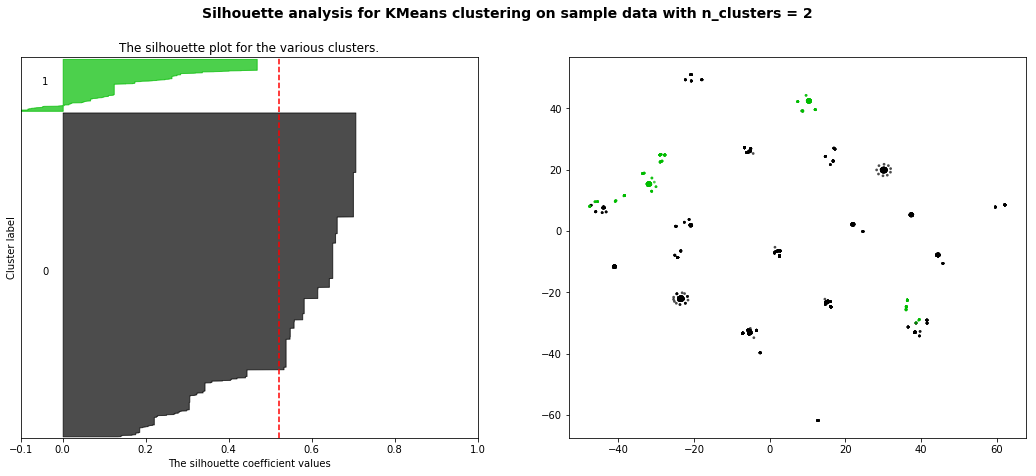

For n_clusters = 3 The average silhouette_score is : 0.3902914255136417
For n_clusters = 3 The average Calinski_Harabaz Score is : 1042.343159901441


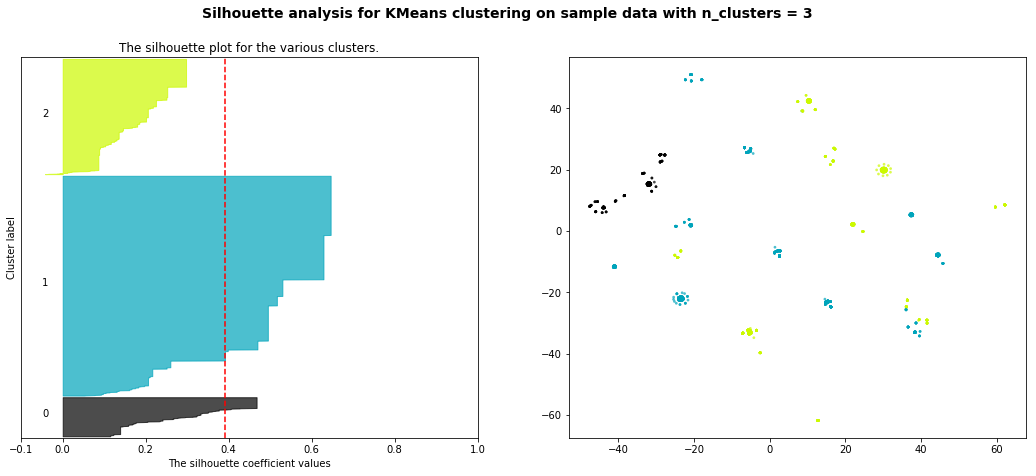

For n_clusters = 4 The average silhouette_score is : 0.4115157652600613
For n_clusters = 4 The average Calinski_Harabaz Score is : 1044.759663262613


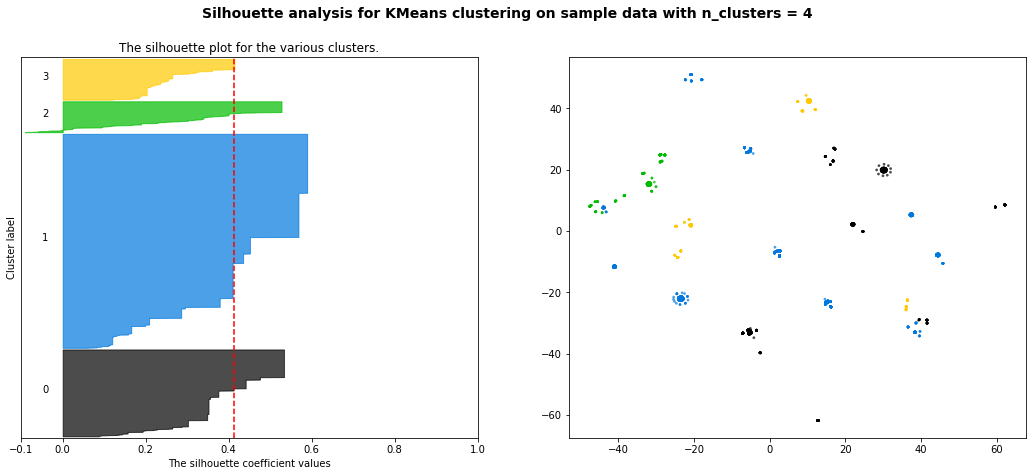

For n_clusters = 5 The average silhouette_score is : 0.4477217470852753
For n_clusters = 5 The average Calinski_Harabaz Score is : 1096.343936530173


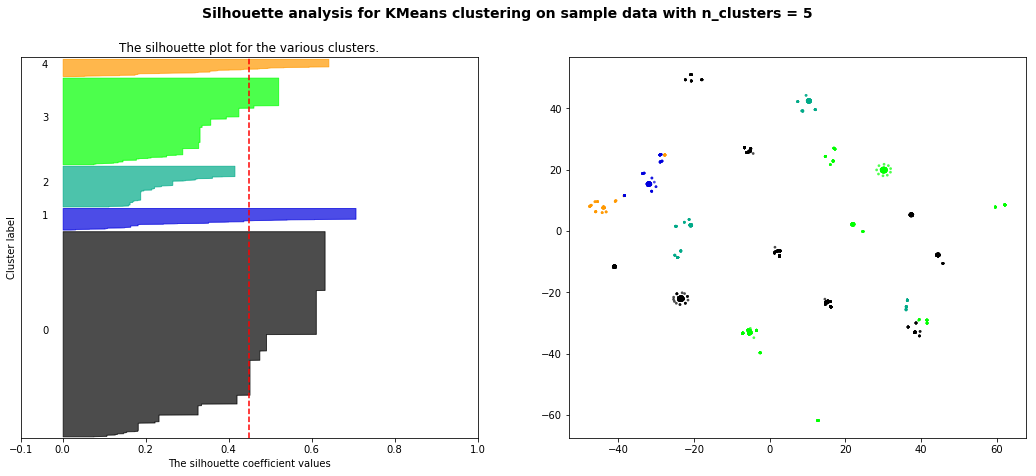

For n_clusters = 6 The average silhouette_score is : 0.4857217105896394
For n_clusters = 6 The average Calinski_Harabaz Score is : 1198.5529294477933


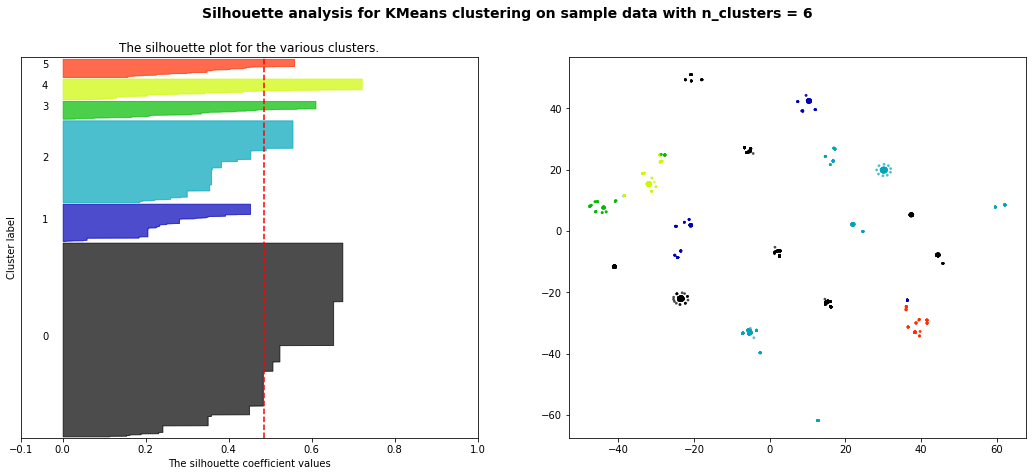

In [15]:
K_means(df_2,clusters_list,True)

For n_clusters = 2 The average silhouette_score is : 0.3368608321500111
For n_clusters = 2 The average Calinski_Harabaz Score is : 942.0204240083815


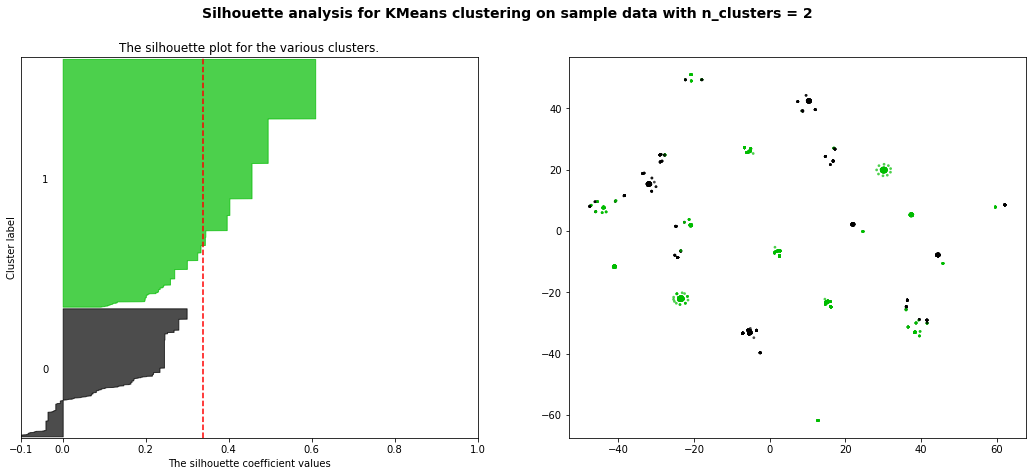

For n_clusters = 3 The average silhouette_score is : 0.33835733824908437
For n_clusters = 3 The average Calinski_Harabaz Score is : 846.2891363498144


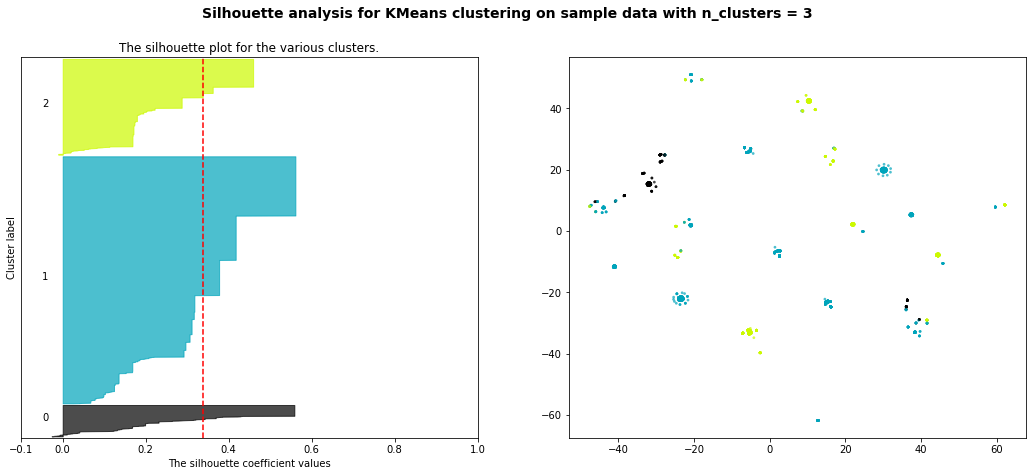

For n_clusters = 4 The average silhouette_score is : 0.29151514952794855
For n_clusters = 4 The average Calinski_Harabaz Score is : 756.8531155966518


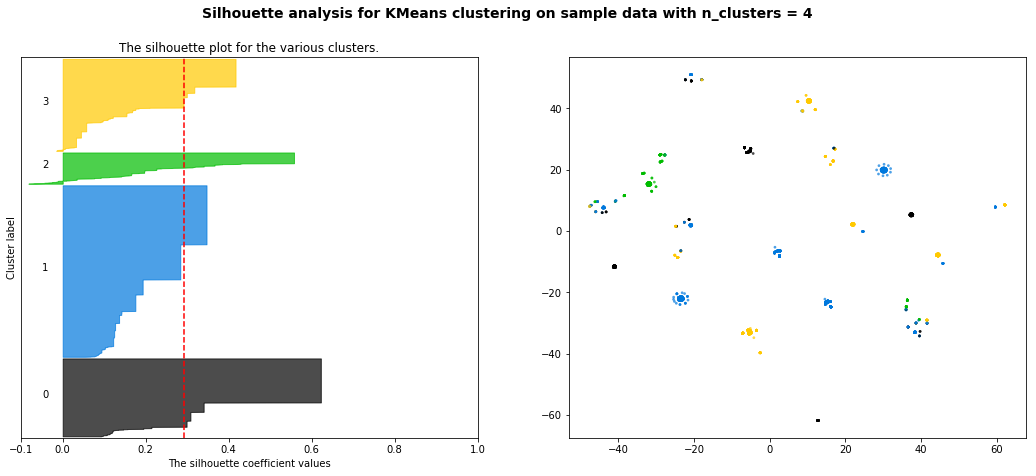

For n_clusters = 5 The average silhouette_score is : 0.315915132267693
For n_clusters = 5 The average Calinski_Harabaz Score is : 713.3135233222797


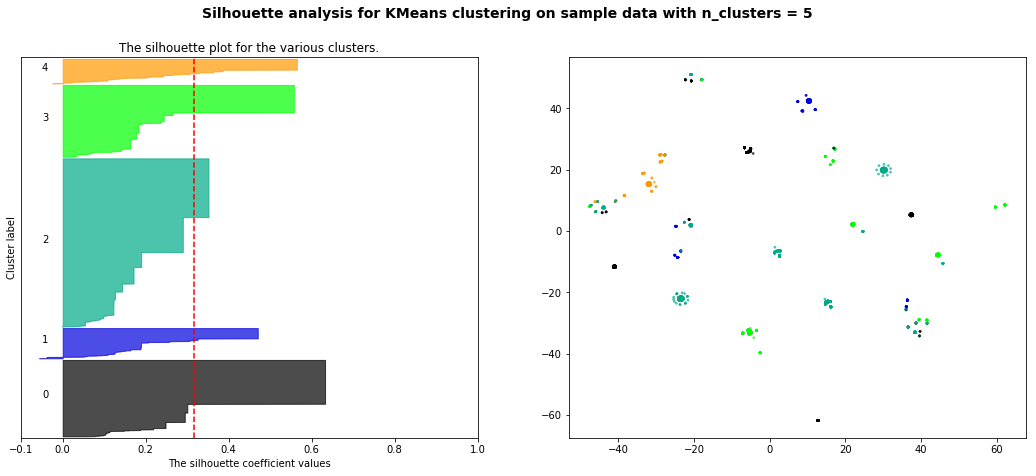

For n_clusters = 6 The average silhouette_score is : 0.34041734599590345
For n_clusters = 6 The average Calinski_Harabaz Score is : 677.0123810470185


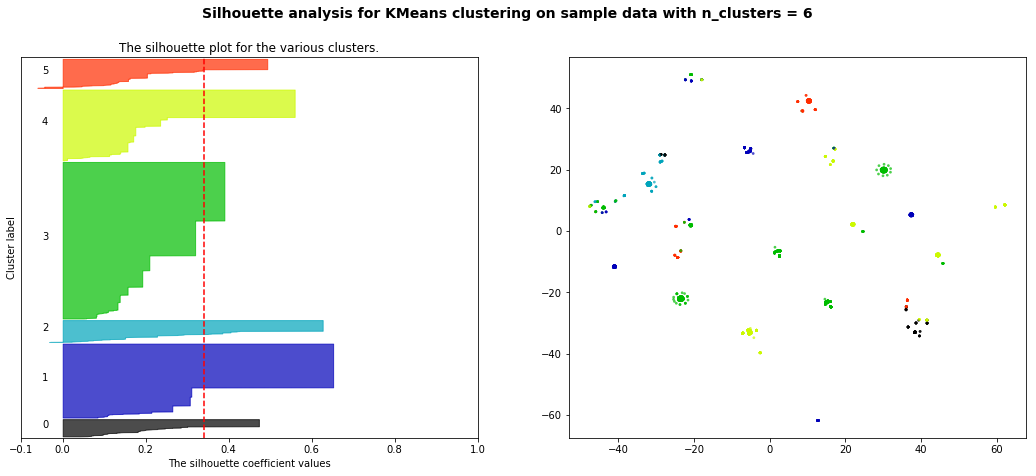

In [16]:
K_means(df_2_std,clusters_list,True)

For n_clusters = 2 The average silhouette_score is : 0.36210563663822204
For n_clusters = 2 The average Calinski_Harabaz Score is : 1221.9518957927767


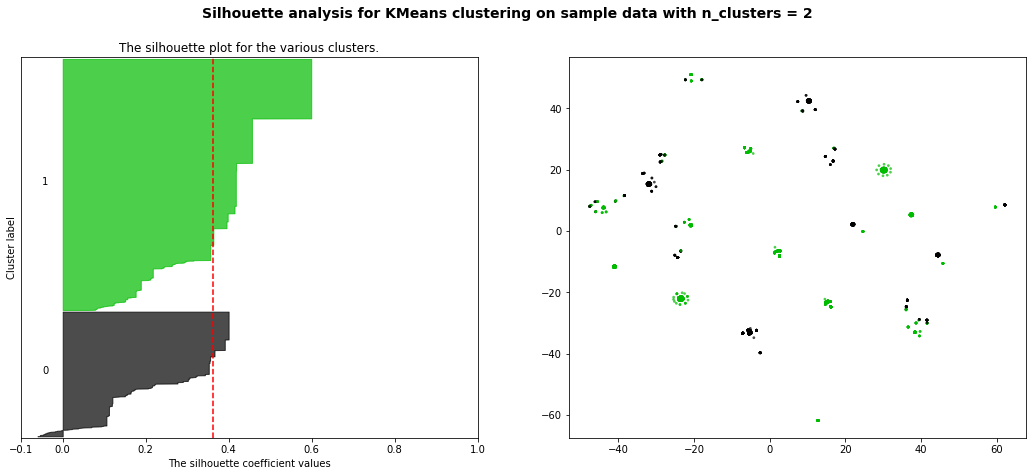

For n_clusters = 3 The average silhouette_score is : 0.29475457150626616
For n_clusters = 3 The average Calinski_Harabaz Score is : 882.1042900045575


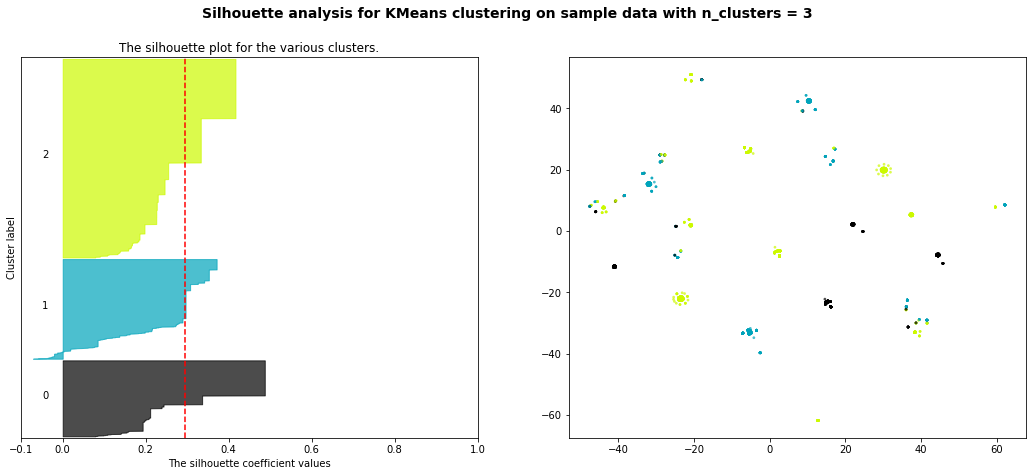

For n_clusters = 4 The average silhouette_score is : 0.33006964887696233
For n_clusters = 4 The average Calinski_Harabaz Score is : 878.3391905763592


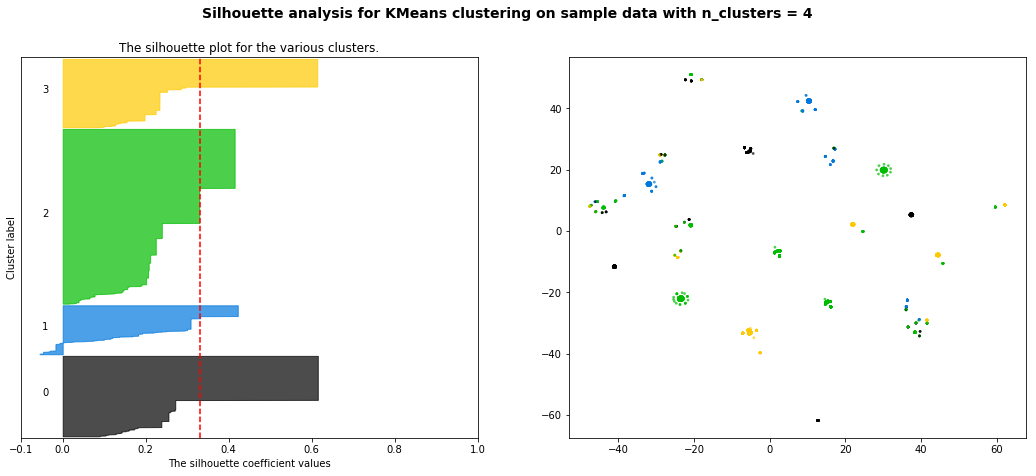

For n_clusters = 5 The average silhouette_score is : 0.3655173481625525
For n_clusters = 5 The average Calinski_Harabaz Score is : 799.8143959431005


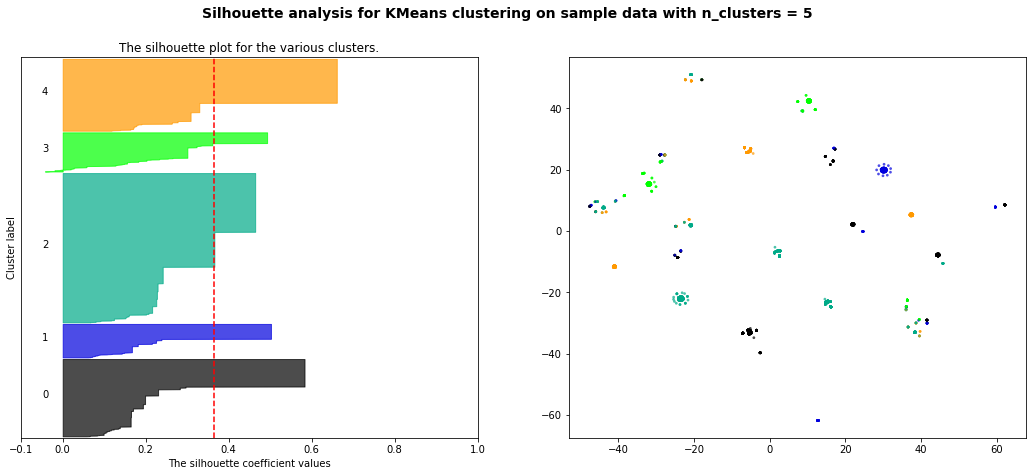

For n_clusters = 6 The average silhouette_score is : 0.41699131013920515
For n_clusters = 6 The average Calinski_Harabaz Score is : 800.396517331913


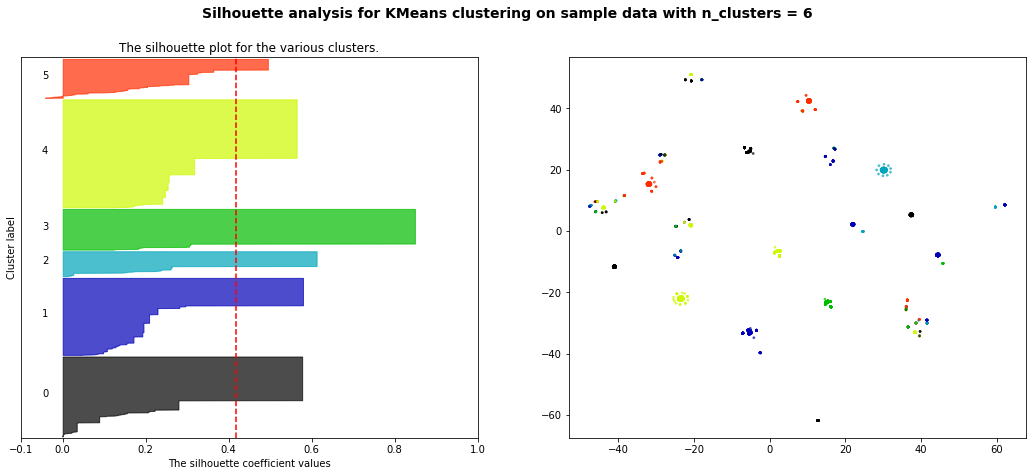

In [17]:
K_means(df_2_mm,clusters_list,False)

For n_clusters = 2 The average silhouette_score is : 0.5391537837072418
For n_clusters = 2 The average Calinski_Harabaz Score is : 1073.139905050944


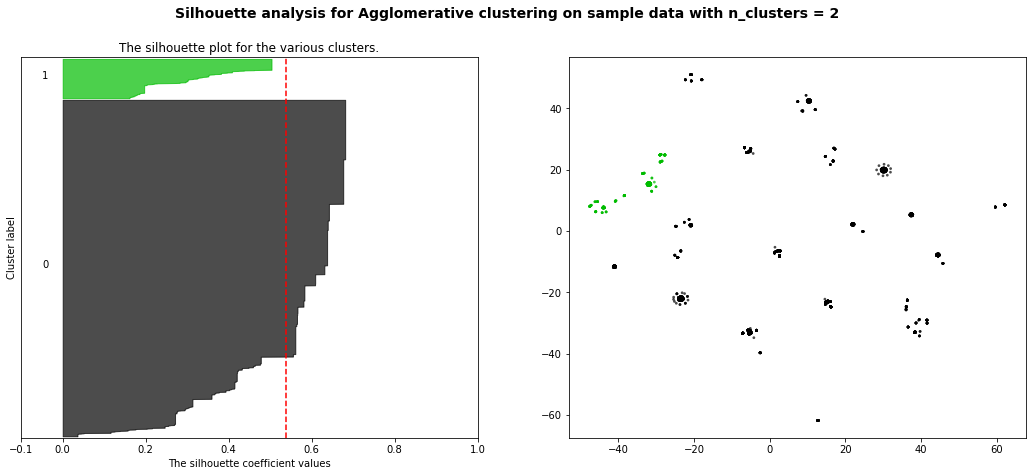

For n_clusters = 3 The average silhouette_score is : 0.4681750238440809
For n_clusters = 3 The average Calinski_Harabaz Score is : 991.3025645038329


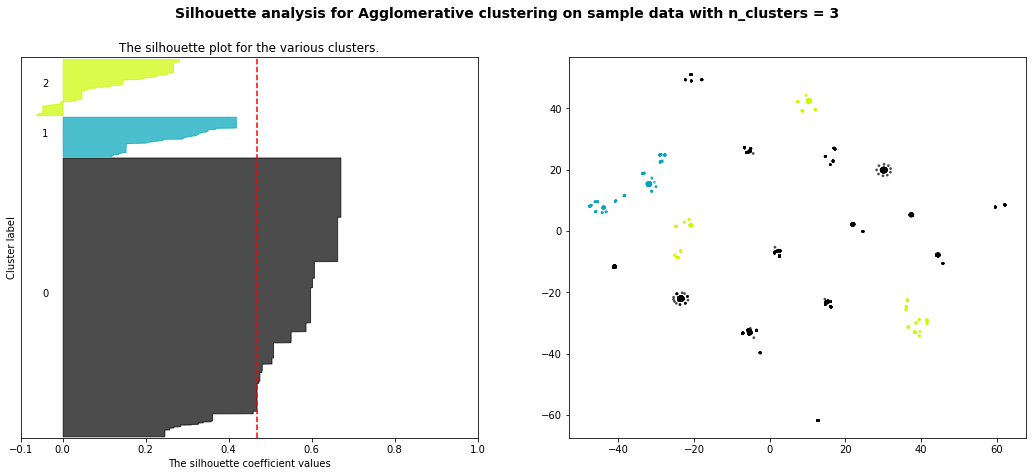

For n_clusters = 4 The average silhouette_score is : 0.4110203935149525
For n_clusters = 4 The average Calinski_Harabaz Score is : 964.5902680538177


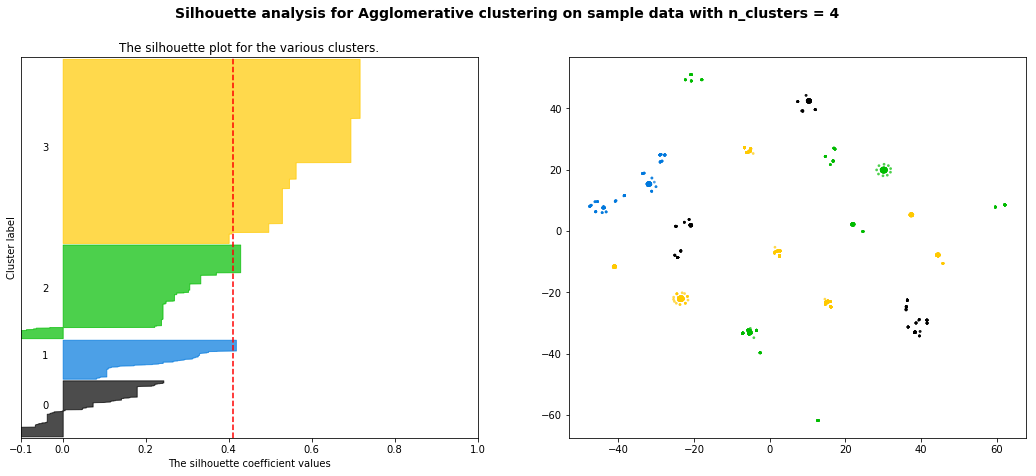

For n_clusters = 5 The average silhouette_score is : 0.4520078926527316
For n_clusters = 5 The average Calinski_Harabaz Score is : 1058.9807973770721


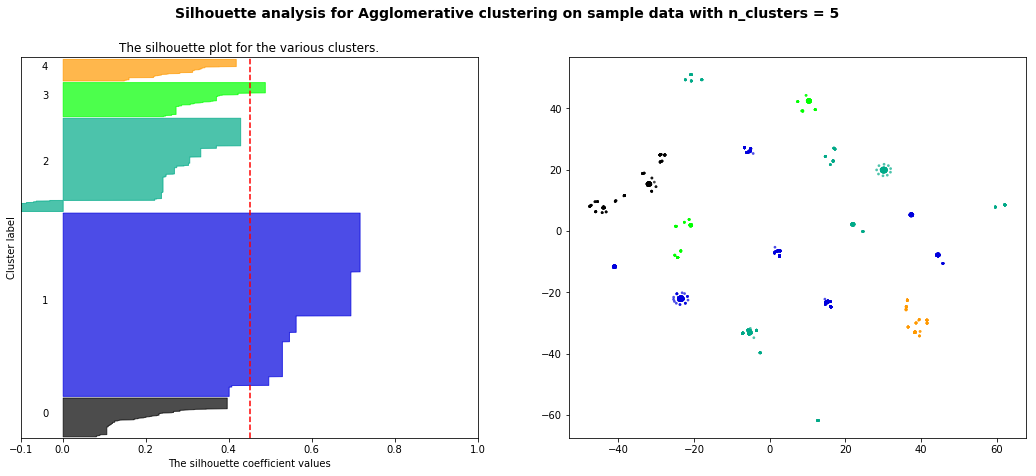

For n_clusters = 6 The average silhouette_score is : 0.47788424701998017
For n_clusters = 6 The average Calinski_Harabaz Score is : 1148.720563171454


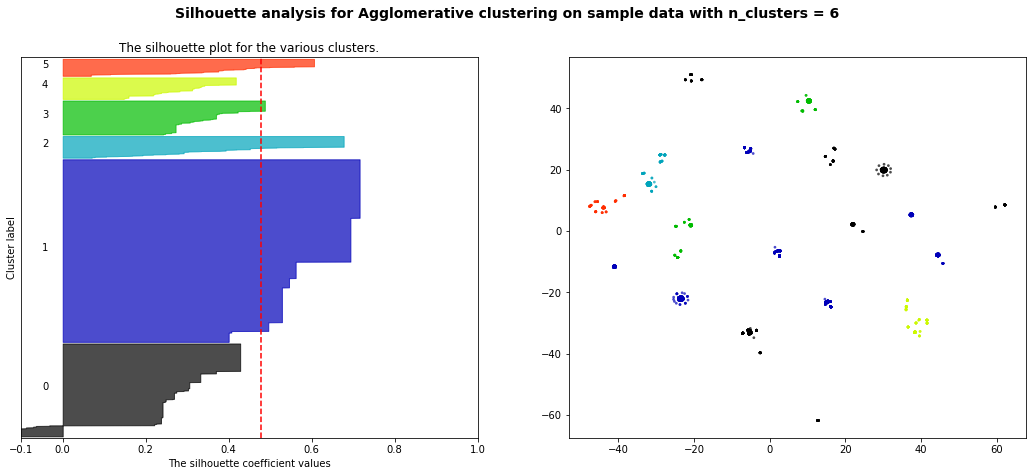

In [18]:
Agglom(df_2,clusters_list,True)

For n_clusters = 2 The average silhouette_score is : 0.3936686168650952
For n_clusters = 2 The average Calinski_Harabaz Score is : 607.9924572397019


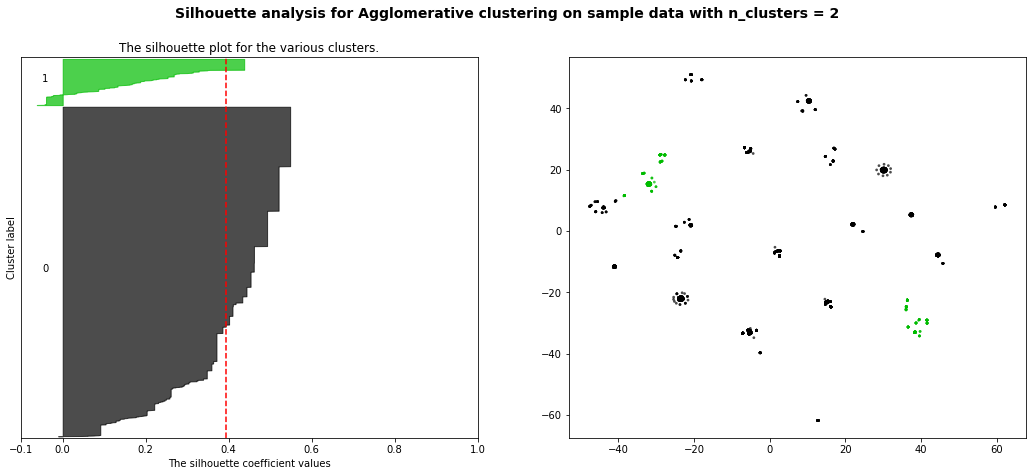

For n_clusters = 3 The average silhouette_score is : 0.23729628639697248
For n_clusters = 3 The average Calinski_Harabaz Score is : 571.8410645129629


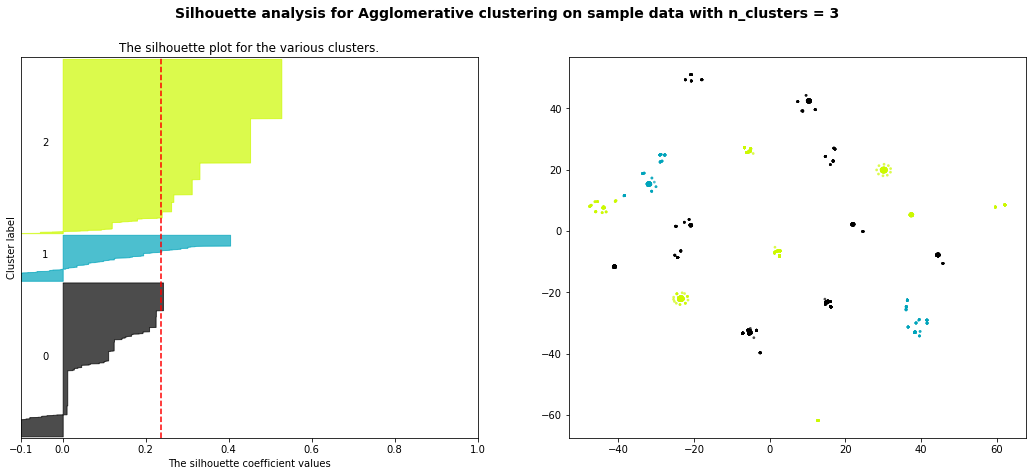

For n_clusters = 4 The average silhouette_score is : 0.25834514229261296
For n_clusters = 4 The average Calinski_Harabaz Score is : 545.8678350084632


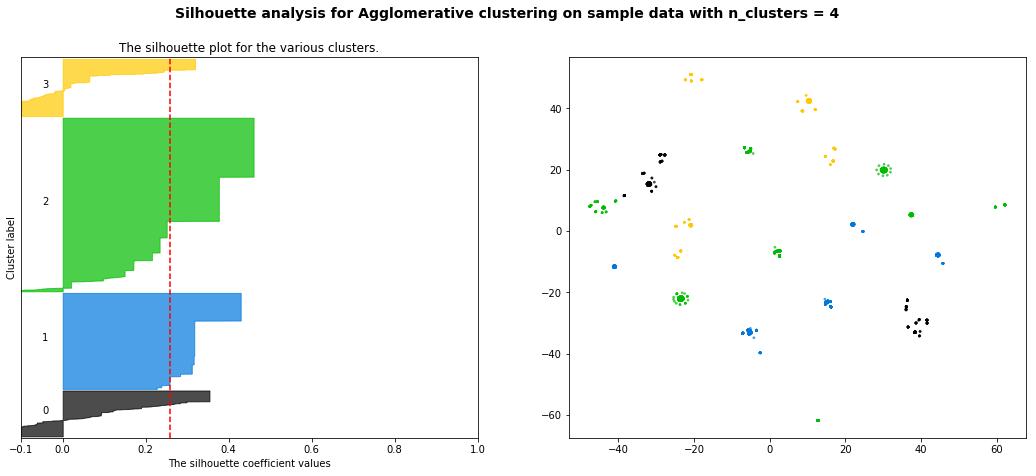

For n_clusters = 5 The average silhouette_score is : 0.2820502713669993
For n_clusters = 5 The average Calinski_Harabaz Score is : 525.6784146202863


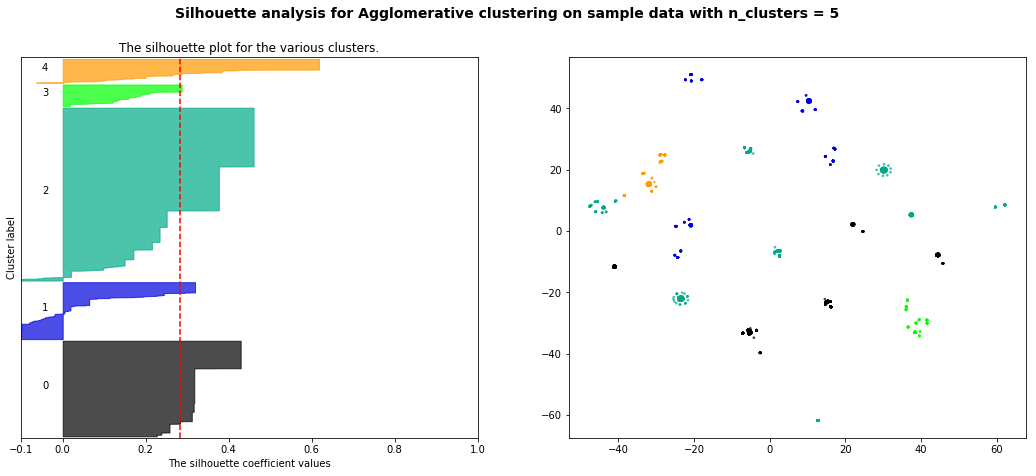

For n_clusters = 6 The average silhouette_score is : 0.2849441418688815
For n_clusters = 6 The average Calinski_Harabaz Score is : 522.605419492645


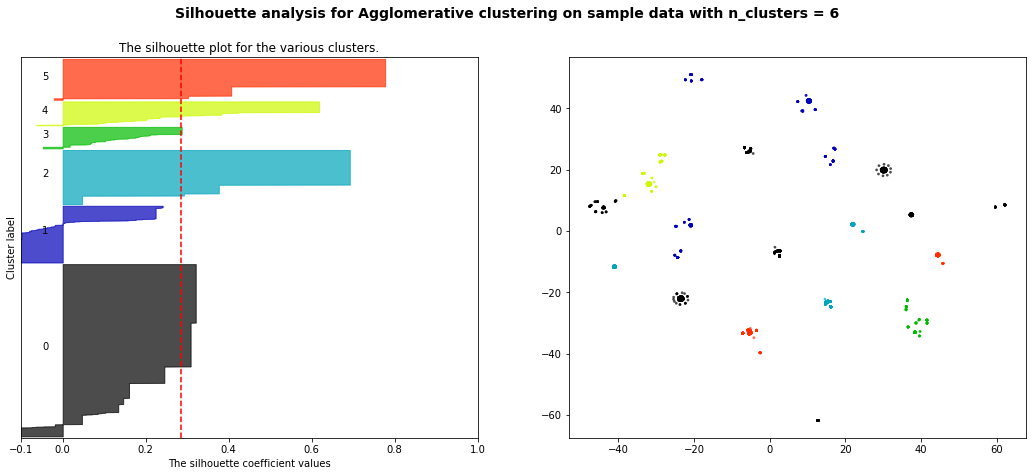

In [19]:
Agglom(df_2_std,clusters_list,True)

For n_clusters = 2 The average silhouette_score is : 0.32517313847147566
For n_clusters = 2 The average Calinski_Harabaz Score is : 1037.0226192550751


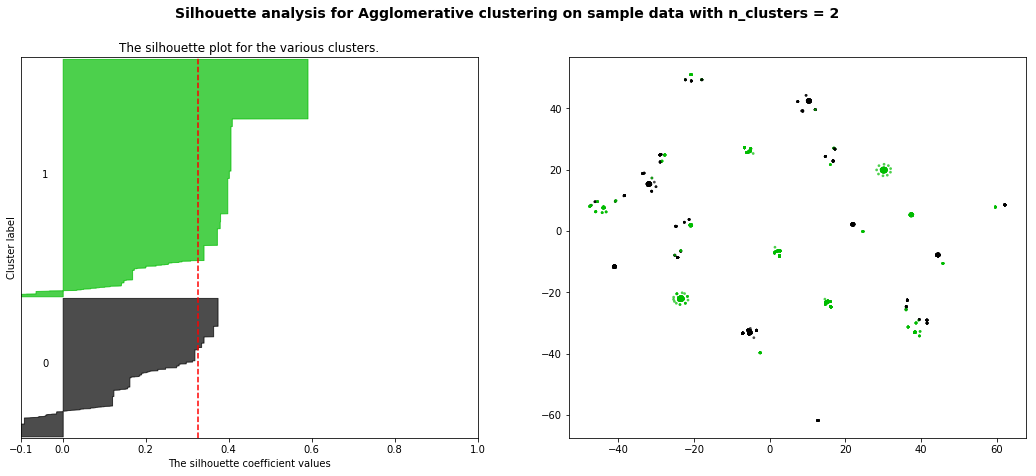

For n_clusters = 3 The average silhouette_score is : 0.280946754714876
For n_clusters = 3 The average Calinski_Harabaz Score is : 736.3716372676156


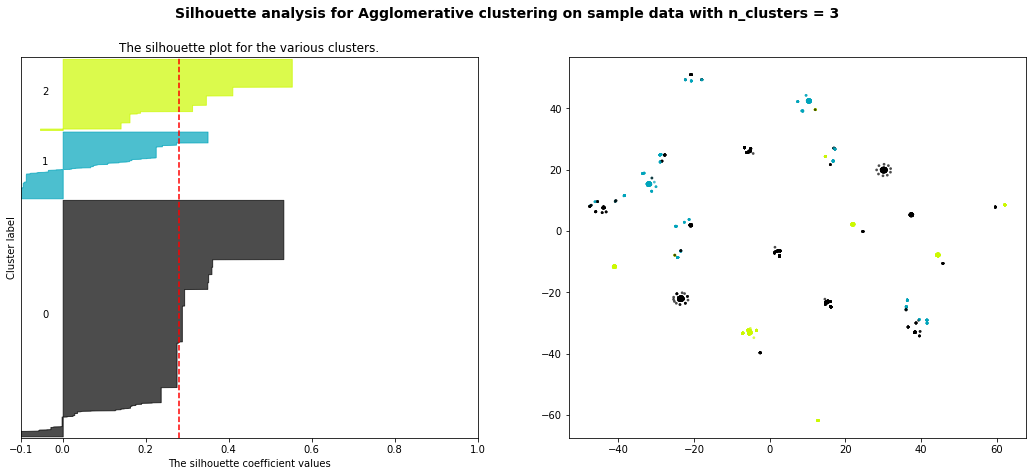

For n_clusters = 4 The average silhouette_score is : 0.26386931195097324
For n_clusters = 4 The average Calinski_Harabaz Score is : 650.9883361032156


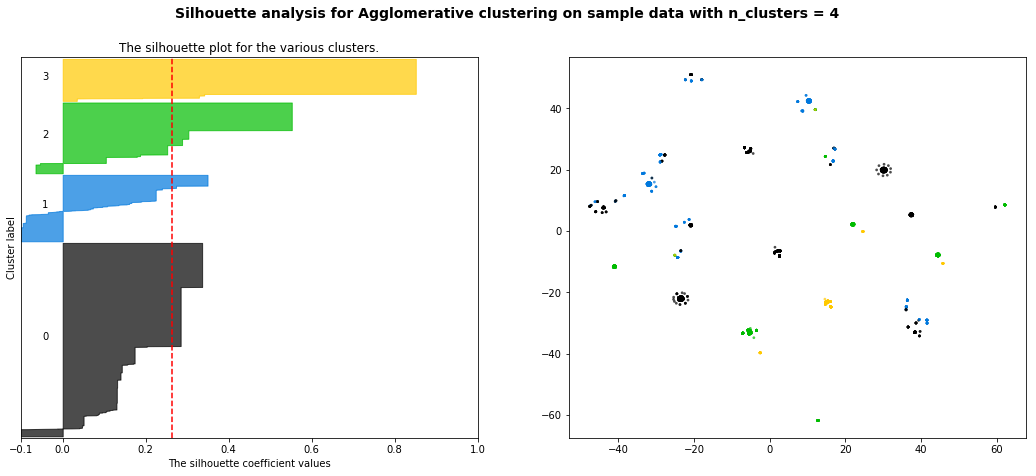

For n_clusters = 5 The average silhouette_score is : 0.3208150659752598
For n_clusters = 5 The average Calinski_Harabaz Score is : 615.4049713520935


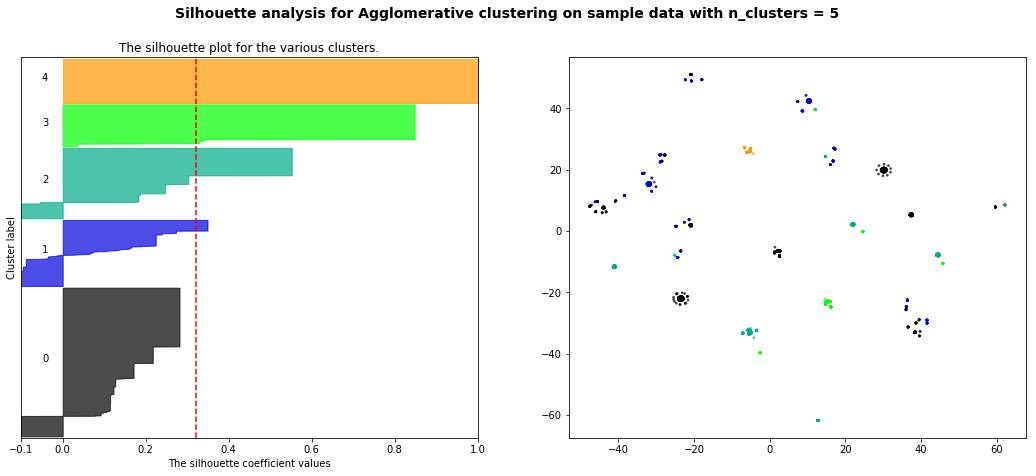

For n_clusters = 6 The average silhouette_score is : 0.3704147318606624
For n_clusters = 6 The average Calinski_Harabaz Score is : 583.3767686380696


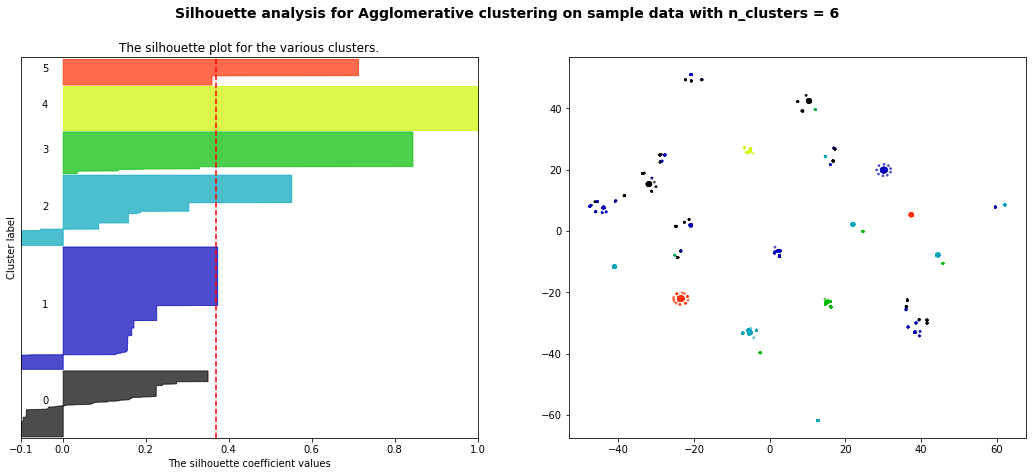

In [20]:
Agglom(df_2_mm,clusters_list,True)

In [21]:
#Affinity
#def Affinity(X,damping,track = True):
#    af = AffinityPropagation(damping = damping).fit(X)
#    n_clusters = len(af.cluster_centers_indices_)
#    labels = af.labels_
#    silhouette_avg = silhouette_score(X,labels)
#    ch_score = calinski_harabaz_score(X,labels)
#    print("For n_clusters =", n_clusters,
#        "The average silhouette_score is :", silhouette_avg)
#    print("For n_clusters =", n_clusters,
#       "The average CH score is :", ch_score)
#    if track == True:
#        models_.append('Affinity')
#        n_clusters_.append(n_clusters)
#        sil_score_.append(silhouette_avg)
#        ch_score_.append(ch_score)
#        sample_silhouette_values = silhouette_samples(X, labels)
#        col = 'Affinity'+str(n_clusters)
#        labels_df[col]=sample_silhouette_values
#    plt.scatter(xt,yt,c=labels)
#    plt.show()

In [22]:
#Affinity(df_2,0.7,False)

In [23]:
#Affinity(df_2_std,0.7,False)

In [24]:
#Affinity(df_2_mm,0.7,False)

In [25]:
#DBSCAN
def DBS(X,eps,track = True):
    rescaledX = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps,min_samples = 10).fit(rescaledX)
    labels = db.labels_
    n_clusters = len(np.unique(labels))
    silhouette_avg = silhouette_score(rescaledX,labels)
    ch_score = calinski_harabaz_score(rescaledX,labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
    print("For n_clusters =", n_clusters,
        "The average CH score is :", ch_score)
    if track == True:
        models_.append('DBSCAN')
        n_clusters_.append(n_clusters)
        sil_score_.append(silhouette_avg)
        ch_score_.append(ch_score)
        sample_silhouette_values = silhouette_samples(X, labels)
        col = 'DBSCAN'+str(n_clusters)
        labels_df[col]=sample_silhouette_values
    plt.scatter(xt,yt,c=labels)
    plt.show()

For n_clusters = 30 The average silhouette_score is : 0.8121828977895891
For n_clusters = 30 The average CH score is : 332.22834654273544


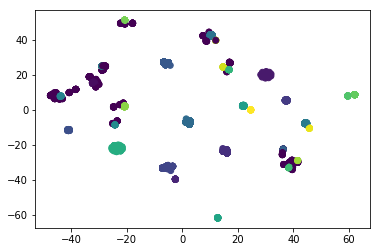

In [26]:
DBS(df_2,0.3,False)

For n_clusters = 30 The average silhouette_score is : 0.8121828977678887
For n_clusters = 30 The average CH score is : 332.2283465427354


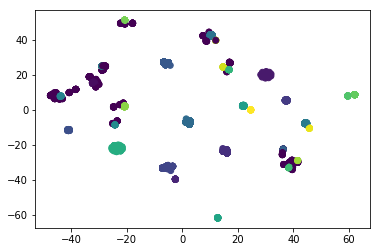

In [27]:
DBS(df_2_std,0.3,False)

For n_clusters = 30 The average silhouette_score is : 0.8121828978015073
For n_clusters = 30 The average CH score is : 332.2283465427353


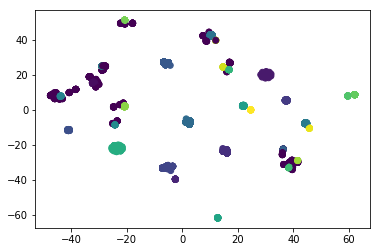

In [28]:
DBS(df_2_mm,0.3,False)

In [29]:
attrs=pd.read_csv('attrs.csv')

In [30]:
attrs.head()

,Unnamed: 0,Anon. ID,Age,Gender,Home Region,Home Post Code,Work Region,Work Post Code,Nationality,Personal Earnings,...,Nationality Count,No of pets,Q2s_1,Q2s_2,Q2s_3,Q2s_4,Q2s_5,Q2s_6,Q2s_7,Q2s_8
0,0,8193,30,Female,Yorkshire & Humber,BD5,Yorkshire & Humber,BD5,United Kingdom,"Less than 15,000",...,1,2,1,2,3,4,5,6,7,8
1,1,20486,43,Female,East Midlands,LN6,East Midlands,LN1,United Kingdom,"75,000 to 84,999",...,1,1,1,0,0,4,5,6,0,0
2,2,20493,23,Female,West Midlands,B65,West Midlands,NaN,United Kingdom,"Less than 15,000",...,1,5,0,0,0,4,0,0,0,0
3,3,20499,34,Male,Scotland,G12,Scotland,G12,United Kingdom,"30,000 to 34,999",...,1,1,0,2,3,4,0,0,0,0
4,4,45077,35,Female,London,CR2,London,NaN,United Kingdom,"Less than 15,000",...,1,1,0,0,3,0,0,0,0,0


In [31]:
attrs.columns

Index(['Unnamed: 0', 'Anon. ID', 'Age', 'Gender', 'Home Region',
       'Home Post Code', 'Work Region', 'Work Post Code', 'Nationality',
       'Personal Earnings', 'Household Earnings', 'Education Level',
       'Relationship Status', 'Employment Status', 'Employment Type',
       'Employment Sector', 'Professional Experience', 'Parental Status',
       'Home Owner/Renter', 'Adults in Household', 'Children in Household',
       'Age and Gender of Child', 'Role in Household', 'Pets',
       'Avg_HH_Earnings', 'Avg_Per_Earnings', 'Nationality Count',
       'No of pets', 'Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4', 'Q2s_5', 'Q2s_6',
       'Q2s_7', 'Q2s_8'],
      dtype='object')

In [32]:
attrs = attrs.set_index('Anon. ID')
attrs = attrs.drop(['Unnamed: 0','Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4', 'Q2s_5', 'Q2s_6',
       'Q2s_7', 'Q2s_8'],axis = 1)

In [33]:
full = pd.merge(attrs,my_df,left_index = True, right_index = True)

In [34]:
full.head()

,Age,Gender,Home Region,Home Post Code,Work Region,Work Post Code,Nationality,Personal Earnings,Household Earnings,Education Level,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
Anon. ID,,,,,,,,,,,,,,,,,,,,,
8193,30,Female,Yorkshire & Humber,BD5,Yorkshire & Humber,BD5,United Kingdom,"Less than 15,000","15,000 to 19,999",O Levels or GCSEs equivalent,...,3,3,3,3,3,3,3,3,3,3
20486,43,Female,East Midlands,LN6,East Midlands,LN1,United Kingdom,"75,000 to 84,999","85,000 to 99,999",Post Graduate: other/not PhD or MA,...,0,5,0,5,5,2,3,5,2,5
20493,23,Female,West Midlands,B65,West Midlands,NaN,United Kingdom,"Less than 15,000","20,000 to 24,999",O Levels or GCSEs equivalent,...,3,5,0,5,5,3,2,1,1,2
20499,34,Male,Scotland,G12,Scotland,G12,United Kingdom,"30,000 to 34,999","50,000 to 59,999",Undergraduate Degree: 4 or more years,...,5,2,1,3,5,2,3,5,3,5
45077,35,Female,London,CR2,London,NaN,United Kingdom,"Less than 15,000","20,000 to 24,999",O Levels or GCSEs,...,0,0,0,3,0,0,2,0,0,2


In [35]:
full.columns

Index(['Age', 'Gender', 'Home Region', 'Home Post Code', 'Work Region',
       'Work Post Code', 'Nationality', 'Personal Earnings',
       'Household Earnings', 'Education Level', 'Relationship Status',
       'Employment Status', 'Employment Type', 'Employment Sector',
       'Professional Experience', 'Parental Status', 'Home Owner/Renter',
       'Adults in Household', 'Children in Household',
       'Age and Gender of Child', 'Role in Household', 'Pets',
       'Avg_HH_Earnings', 'Avg_Per_Earnings', 'Nationality Count',
       'No of pets', 'Q1', 'Q2_total', 'Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4',
       'Q2s_5', 'Q2s_6', 'Q2s_7', 'Q2s_8', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15'],
      dtype='object')

In [36]:
model = KMeans(n_clusters = 2)
labels = model.fit_predict(df_2)

In [37]:
model_2 = AgglomerativeClustering(n_clusters = 2)
labels_2 = model_2.fit_predict(df_2)

In [38]:
full['labels'] = labels

In [39]:
full['labels_2'] = labels_2

In [40]:
full['labels'].value_counts()

0    2198
1     302
Name: labels, dtype: int64

In [41]:
full['labels_2'].value_counts()

0    2238
1     262
Name: labels_2, dtype: int64

In [42]:
#full['labels']=np.where((full['labels']==0),1,0)

In [43]:
#full['labels'].value_counts()

### Exploratory Analysis

In [44]:
full.columns

Index(['Age', 'Gender', 'Home Region', 'Home Post Code', 'Work Region',
       'Work Post Code', 'Nationality', 'Personal Earnings',
       'Household Earnings', 'Education Level', 'Relationship Status',
       'Employment Status', 'Employment Type', 'Employment Sector',
       'Professional Experience', 'Parental Status', 'Home Owner/Renter',
       'Adults in Household', 'Children in Household',
       'Age and Gender of Child', 'Role in Household', 'Pets',
       'Avg_HH_Earnings', 'Avg_Per_Earnings', 'Nationality Count',
       'No of pets', 'Q1', 'Q2_total', 'Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4',
       'Q2s_5', 'Q2s_6', 'Q2s_7', 'Q2s_8', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'labels', 'labels_2'],
      dtype='object')

In [45]:
full.groupby(by = 'labels').Q2_total.mean()

labels_2
0     5.623771
1    23.015267
Name: Q2_total, dtype: float64

In [48]:
full.groupby(by = 'labels').mean()

,Age,Children in Household,Avg_HH_Earnings,Avg_Per_Earnings,Nationality Count,No of pets,Q1,Q2_total,Q2s_1,Q2s_2,...,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,labels_2
labels,,,,,,,,,,,,,,,,,,,,,
0,41.019108,0.762056,35562.045380,24130.953773,1.026843,1.540036,3.178344,5.281620,0.490446,0.666970,...,1.421747,1.283439,2.173794,2.371702,1.345314,1.738854,1.851683,1.763876,1.884895,0.00000
1,35.870861,1.258278,39660.445736,30200.993289,1.039735,1.996689,4.188742,23.201987,0.658940,1.218543,...,2.622517,2.341060,3.016556,3.218543,2.456954,2.559603,2.913907,2.761589,2.870861,0.86755


In [49]:
full.columns

Index(['Age', 'Gender', 'Home Region', 'Home Post Code', 'Work Region',
       'Work Post Code', 'Nationality', 'Personal Earnings',
       'Household Earnings', 'Education Level', 'Relationship Status',
       'Employment Status', 'Employment Type', 'Employment Sector',
       'Professional Experience', 'Parental Status', 'Home Owner/Renter',
       'Adults in Household', 'Children in Household',
       'Age and Gender of Child', 'Role in Household', 'Pets',
       'Avg_HH_Earnings', 'Avg_Per_Earnings', 'Nationality Count',
       'No of pets', 'Q1', 'Q2_total', 'Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4',
       'Q2s_5', 'Q2s_6', 'Q2s_7', 'Q2s_8', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'labels', 'labels_2'],
      dtype='object')

In [51]:
full[['Q1', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15','labels']].groupby(by = 'labels').mean()

,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
labels,,,,,,,,,,,,,,
0,3.178344,1.775705,2.183348,1.686533,2.067789,1.421747,1.283439,2.173794,2.371702,1.345314,1.738854,1.851683,1.763876,1.884895
1,4.188742,3.662252,3.231788,2.493377,3.231788,2.622517,2.341060,3.016556,3.218543,2.456954,2.559603,2.913907,2.761589,2.870861


In [288]:
df = full[['Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4',
       'Q2s_5', 'Q2s_6', 'Q2s_7', 'Q2s_8','labels']]
df.index = df['labels']
df = df.drop('labels',axis=1)

In [289]:
df.index

Int64Index([1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
            ...
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='labels', length=2500)

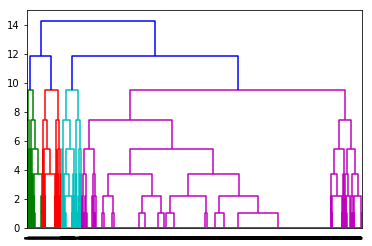

In [290]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
#import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(df,method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=df.index,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


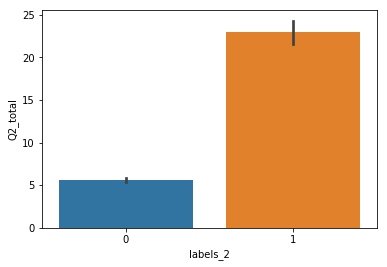

In [291]:
sb.barplot(data = full, x = "labels_2",y = "Q2_total")

In [292]:
X = df
y = df.index

In [293]:
df.index

Int64Index([1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
            ...
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='labels', length=2500)

In [294]:

import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 10)
tree_clf.fit(X,y)

import pydotplus

dot_data = export_graphviz(tree_clf,out_file = None,
                           feature_names = X.columns, filled = True,
                          rounded = True)
graph = graphviz.Source(dot_data)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_final.png')
graph
plt.show()

In [295]:

import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 10)
tree_clf.fit(X,y)

import pydotplus

dot_data = export_graphviz(tree_clf,out_file = None,
                           feature_names = X.columns, filled = True,
                          rounded = True)
graph = graphviz.Source(dot_data)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_final_2.png')
graph
plt.show()

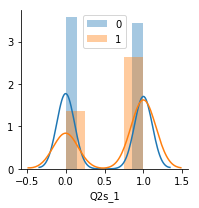

In [275]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_1")
plt.legend()
plt.show()

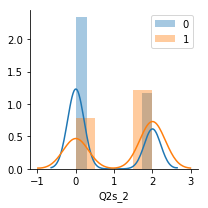

In [276]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_2")
plt.legend()
plt.show()

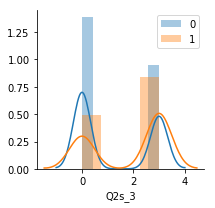

In [277]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_3")
plt.legend()
plt.show()

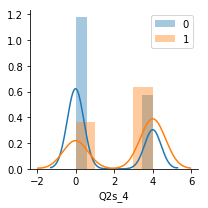

In [278]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_4")
plt.legend()
plt.show()

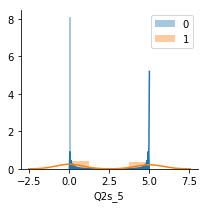

In [279]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_5")
plt.legend()
plt.show()

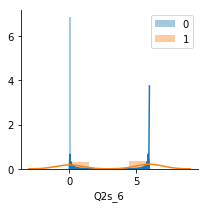

In [280]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_6")
plt.legend()
plt.show()

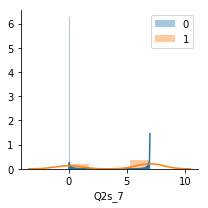

In [281]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_7")
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


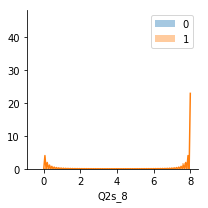

In [282]:
g = sb.FacetGrid(full,hue = 'labels')
g = g.map(sb.distplot,"Q2s_8")
plt.legend()
plt.show()

In [283]:
from sklearn.utils import resample
#Upsample
df = full
df_majority = df[df['labels'] ==0]
df_minorty = df[df['labels']==1]

df_minority_upsampled = resample(df_minorty,
                                replace = True,
                                n_samples = 2198,
                                random_state = 25)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

df_upsampled['labels'].value_counts()

1    2198
0    2198
Name: labels, dtype: int64

In [284]:
full.columns

Index(['Age', 'Gender', 'Home Region', 'Home Post Code', 'Work Region',
       'Work Post Code', 'Nationality', 'Personal Earnings',
       'Household Earnings', 'Education Level', 'Relationship Status',
       'Employment Status', 'Employment Type', 'Employment Sector',
       'Professional Experience', 'Parental Status', 'Home Owner/Renter',
       'Adults in Household', 'Children in Household',
       'Age and Gender of Child', 'Role in Household', 'Pets',
       'Avg_HH_Earnings', 'Avg_Per_Earnings', 'Nationality Count',
       'No of pets', 'Q1', 'Q2_total', 'Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4',
       'Q2s_5', 'Q2s_6', 'Q2s_7', 'Q2s_8', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'labels', 'labels_2'],
      dtype='object')